<a href="https://colab.research.google.com/github/steeve85ok/SIM_YAC_ALMEIDA_UPSE2023/blob/main/ex26%20y%2027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

26.	Resuelva el siguiente ejercicio implementando un esquema explicito obteniendo distribución de Presiones en PSI y Caudales en Ft^3/Hora

27. Resuelva el siguiente ejercicio implementando un esquema implicito obteniendo distribución de Presiones en PSI y Caudales en Ft^3/Hora

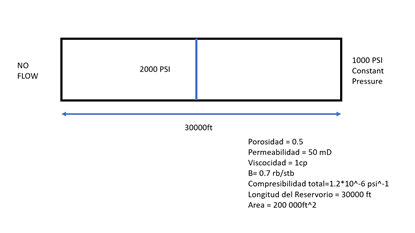

In [1]:
import numpy  as np
import math

In [2]:
L=30000                 #Longitud total del yacimiento ft
dx=150                  #espacios entre nodos
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt= numero de días)
DT=10                   # intervalo de tiempo por día
K=50                    #Permeabilidad MD
por=0.5                 #porosidad
vis=1                   # centipoise      #viscosidad
Beta=0.7                #factor volumetrico
CompTotal=1.2**(-6)     #psi-1 #compresibilidad total
A=200000                #ft^2           #area de yacimiento

In [3]:

Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2) #por lo general eta es < que 0.5 para que el sistema sea estable
Eta

0.13271039999999995

In [4]:
#Esquema Explícito Pi(**)n+1=Pi(**)n + alphaDT/dx**2 [Pi-1(**)n - 2Pi(**)n + Pi+1(**)n], considerar Eta=alphaDT/dx2, Estable: Eta menor 0.5
def Presdt(P0,P1,P2,Eta):    # (funcion esquema eplicito usando Eta en lugar DT y dx)
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)
#corrección de condicion de frontera de dirichlet generalmente se la usa en la frontera izquierda   Pi(**)n+1 = eta(2Pbizq-Pi(**)n) + (1-2eta)Pi(**)n + eta Pi+1(**)n
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #  matriz que va a guardar todos los resultados. Filas N: Iteraciones, Columnas m: numero de Nodos: division long yac / dx = 200 (+2 que son las fronteras)


In [5]:
#Condiciones iniciales esuqema explícito
Pyac=2000                 # presion de yacimiento psi # se da valores al vector de presiones inciales
Piz=0                     # presion frontera izquierda psi
Pder=1000                 # presion frontera derecha psi
Pin=np.ones((L//dx)+2)    # vector de presiones iniciales (es cantidad de nodos y los datos están con unos), la corrección de condiciones de frontera es añadir dos nodos uno por extremo, es por esta razon que sumamos 2
Pres=np.zeros((L//dx)+2)  # vector de resultados: vector vacio zeros que representa las condiciones iniciales.(cantidad de nodos de la matriz+2) creación de una matriz vacia con las mismas dimensiones de la matriz de donde se guardara todo los resultados
Pres2=np.zeros((L//dx)+2) # vector de resultados para la solucion implicita (si fuera necesario)
Pin=Pin*Pyac              # valores del vector incial como presion de yacimiento (tiempo=0); definición para obtener las demas celdas de la primera fila de la matriz sin contar los extremos
#Atribuir valores al vector d condiciones iniciales
Pin[0]=2*Piz-Pin[1]       # primera celda (0) del vector Pin será Presión CORREGIDA  igual a dos veces de la presion de la izquierda menos la presión pinicial de 1
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]    # ultima celda del vector Pin menos 1 en python es presión final CORREGIDA es igual a  a dos veces la presión de la derecha menos la presión de la anterior que seria la longitud  de Pin menos 2

Pin                       # despliega el vector de presiones iniciales


array([-2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
      

In [6]:
Pin.shape # dimension del vector de presiones incial : 200 nodos mas 2; division long yac para dx = 200 (+2 que son las fronteras)

(202,)

In [ ]:
Pin[0] # Orden de ubcaciones de pyton:valor de la primera celda (primera fila y primera columna); representa la correccion de la frontera izquierda

-2000.0

In [7]:
Pin[len(Pin)-1] # Orden de ubcaciones de pyton: valor de la ultima celda (primera fila y última columna y ); representa la correccion de la frontera dereca

0.0

In [8]:
len(Pin) # cantidad de elementos del vector incial

202

In [9]:
Pexplicita.shape # dimension de Matriz explicita, numero de filas=Teimpo/DT; columnas= nodos + 2 (correctivos)

(10000, 202)

Ciclo explicito en base al tiempo y espacio

In [28]:
t=DT                              # Tiempo que ha tarnscurrido despues del tiempo=0
Pexplicita[0]=Pin                 # en la matriz Pexplicita, la presion de la primera fila será la presión incial(0). Presion explicita de la PRIMERA fila cero va ser igual a la presion inicial. Le da el valor inicial a la fila cero
while t<Tiempo:                   # Creación del ciclo while es en base al tiempo; Se empieza calculos llenarán la fila 2,3,... (se tendran resultados con una iteracion menos)
  for i in range(0,len(Pin)):   # creacion del ciclo de espacio Ciclo For (columnas: (0)es primer valor, (Pin)-1 es ultimo valor); este codigo indica toda la fila de condiciones iniciales
    if i==0:                      # i==0 representa la posición del nodo en todos los puntos de la frontera izquierda # cuando i vale cero nos referimos al primer nodo izq, de la fila t=0 condicones iniciales
      Pres[i]=0        # Pin[0]=2*Piz-Pin[1] definido en condiciones iniciales, (con vector de resultados Pres se llenan  todos los valores de la columna en i =0, frontera izq) #se edito por las correcciones dirichlet de frontera, nueva ecuac# # Presión de resultado evaluado en i va ser la misma presion de la condición inicial
    elif i==len(Pin)-1:            # posición de i en frontera derecha #representa el ultimo nodo (fila lado derecho) que es la longitud del vector de la fila t=0 de las condiciones iniciales
      Pres[i]=1000     # Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2] definido en condiciones iniciales, (así se llenan todos los valores de la columna final i = num nodos menos 1, frontera der) # se edito##La presion de resultado es igual a la presion inicial del ultimo nodo final derecho añadido un nodo t=0
    else:                             # en todos los demás puntos  se llamará a la funcion denominada Presdt para las presiones futuras
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)  # triangulo de posicion i, i-1, i+1, con relacion a valores del vector anterior que sería la presion de i-1, presion de i, presion de i+1; factor Eta (dif a 1); con i da cambio nodo por nodo  # llamamos a la función este codigo de presion de resultado nos ayuda a obtener los siguientes nodos(i) de en medio de la fila de dt, y se repite el ciclo para las siguientes dt
  Pexplicita[t//DT]=Pres            # Pres vector pone valores en la siguiente fila de la matriz (sale del condicional)  #MATRIZ de solucion o DE RESULTADOS Los valores calculados de los triangulos se guardaran en la matriz de resultados,tiempo/delta t obtenemos el numero de iteraciones o indices de cada fila/A MEDIDA QUE VAMOS AUMENTANDO EL DT ES IGUAL A LA PRESION CALCULAD
  t=t+DT                           # siguiente ciclo  #este codigo ayudara que las siguientes filas de dt en este caso 3dt en adelante y las siguientes iteraciones se vayan calculando
  Pin=Pres                         # vector inicial recopila al vector de resultads anterior, y llena los triangulos sucesivamente #la presion inicial cambia a medida que vamos llenano los triangulos

In [26]:
Pexplicita[1]                   # Resultados de la matriz seteada

array([   0.        ,    6.12035245,   12.23898236,   18.3543963 ,
         24.46510166,   30.56960702,   36.66642254,   42.75406032,
         48.83103473,   54.89586279,   60.94706456,   66.98316344,
         73.00268659,   79.00416524,   84.9861351 ,   90.94713664,
         96.88571553,  102.80042294,  108.68981591,  114.5524577 ,
        120.38691813,  126.19177395,  131.96560917,  137.7070154 ,
        143.41459221,  149.08694746,  154.72269764,  160.3204682 ,
        165.87889392,  171.39661917,  176.87229833,  182.30459605,
        187.69218759,  193.03375917,  198.32800826,  203.5736439 ,
        208.76938705,  213.91397083,  219.00614091,  224.04465577,
        229.02828698,  233.95581957,  238.82605226,  243.63779778,
        248.38988316,  253.08115002,  257.71045483,  262.27666922,
        266.77868022,  271.21539055,  275.58571891,  279.8886002 ,
        284.1229858 ,  288.28784384,  292.38215941,  296.40493486,
        300.35519001,  304.2319624 ,  308.0343075 ,  311.76129

In [21]:
Pexplicita.shape

(10000, 202)

esquema implicito

In [ ]:
#Esquema Implicito se resuelve con un sistemas de ecuaciones,una de las caracteristica es el tamaño de la matriz diagonal depende de los triangulos que son ecuaciones lineales al mismo tiempo tenemos incognitas
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #primero se crea la matriz q va obtner los resultados las dimensiones de la matriz son (tiempo/DT,L/DX), adicional se aumneto dos nodos a los extremos

Pin=np.ones((L//dx)+2) #vector de presiones iniciales (es cantidad de nodos y los datos están con unos)
Pres=np.zeros((L//dx)+2) #VECTOR INICIAL
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2 #edito# #¿COMO SE CALCULA EL NUMERO DE NODOS L//dx
Matriz_resolucion=np.zeros([N-2,N-2]) #matriz para resolver el sistema de ecuaciones ¿que dimensiones va tener? N-2 FILAS, Y N-2 COLUMNAS Y SON IGUALES PORQUE ES UNA MATRIZ CUADRADA

In [ ]:
#LLENAMOS LA MATRIZ DE RESULTADO ESTO ES PARA UN SOLO CICLO / esta matriz de resolucion es solo para calcular el sistema de ecuaciones
for i in range(N-2):              #INDICES I=J NO SE COLOCO J XQ ES IGUAL A i son valores de la diagonal
  Matriz_resolucion[i,i]=1+2*Eta  #llena los valores de la diagonal# va [i,i] porq es solo PARA UN SOLO CICLO xq va i,i xq en la diagonal los indice de la matriz son iguales y d ahi llenamos toda la diagonal i es igual a j por eso le colocamos i,i , correr por fila fila de esta matriz y va exactamente con la misma columna equivalente (giagonal)y colocar el valor 1+2eta
  if i>0:                           # tenemos si i es mayor a cero. el primero no tiene valor de la diagonal es por eso q i tiene q ser mayor a 0 porque la siguiente fila q es 1 ahi si hay valor de diagonal que seria - lambda
    Matriz_resolucion[i,i-1]=-Eta  #tenemos que el valor de la matriz de resolución de la fila i y columna i-1 es igual -eta con este codigo vamos a llenar todas las casillas a la izquierda de la diagonal, aqui no vamos a tener - lambda en la primera fila de la izquierda de la diagonal
  if i<(N-3):                       #a todos los valores cuando i sea menor a n-3 le ponemos un valor a la derecha , en la fila tenemos n-2 entonces la siguiente fila es n-3, matriz n-2 por n-2 pero la ultima fila no tiene valor a la derecha y solo vamos a poner ese menos eta a la derecha de la diagonal pero hasta la fila antes
    Matriz_resolucion[i,i+1]=-Eta   #ahora llenamos las casillas de la parte derecha de la diagonal

In [ ]:
Matriz_resolucion.shape

(200, 200)

In [ ]:
Matriz_resolucion2=np.zeros_like(Matriz_resolucion) # Creación de la matriz con la condiciones de dirichlet
for i in range(0,N-3):
  Matriz_resolucion2[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion2[i,i-1]=-Eta
  if i<(N-4):
    Matriz_resolucion2[i,i+1]=-Eta

Matriz_resolucion2[1,1] =1+3*Eta
Matriz_resolucion2[N-3,N-3] =1+Eta
Pin[1]=2*Eta*Piz

In [ ]:
Pin.shape
Matriz_resolucion2.shape

(200, 200)

In [ ]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])

In [ ]:
Pcal

array([ 171.24747902, 1632.87972836, 1961.06539224, 1995.87082545,
       1999.56208413, 1999.95355723, 1999.99507455, 1999.99947764,
       1999.9999446 , 1999.99999412, 1999.99999938, 1999.99999993,
       1999.99999999, 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.     

In [ ]:
Pder

1000

In [ ]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([   0.        ,  171.24747902, 1632.87972836, 1961.06539224,
       1995.87082545, 1999.56208413, 1999.95355723, 1999.99507455,
       1999.99947764, 1999.9999446 , 1999.99999412, 1999.99999938,
       1999.99999993, 1999.99999999, 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.     

In [ ]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

Graphicar Pexplicita (ver gradiente de presion),1er seteo Pyac=2000, Piz=0, Pder=1000 (forma no sinoidal)  dx= 150; probar con dx=1500 influye numero de nodos (impreciso muy pocos nodos influyen en error) datos: L=30000                 #Longitud total del yacimiento ft
dx=150                  #espacios entre nodos
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt= numero de días)
DT=10

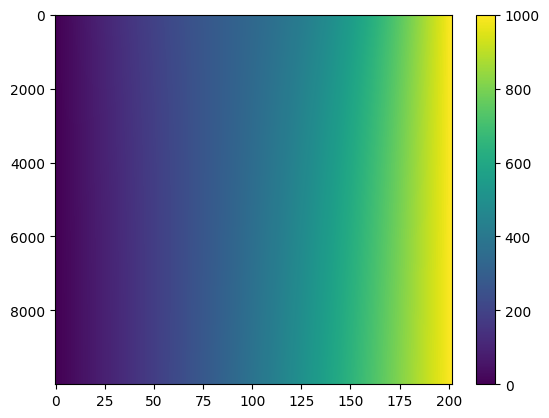

In [29]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

Graphicar Pimplicita (ver gradiente de presion),1er seteo Pyac=2000, Piz=0, Pder=1000 (forma no sinoidal) dx= 150; probar con dx=1500 influye numero de nodos (impreciso muy pocos nodos influyen en error)

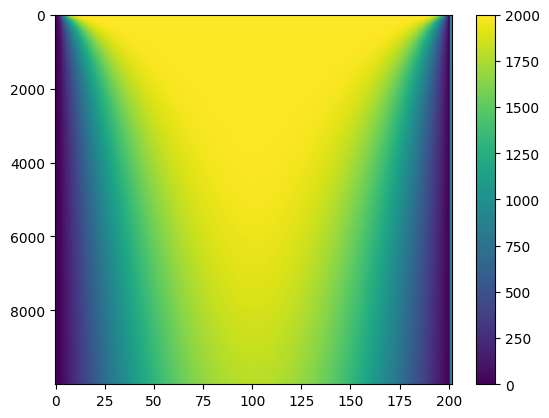

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()